In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
options={"model":"cfg/yolo.cfg",
         "load":"bin/yolov2.weights",
         "threshold":0.4,
         "gpu":0.6
        }
tfnet=TFNet(options)

C:\Users\Anidh Singh\Desktop\YOLO\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.04600214958190918s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [27]:
img=cv2.imread("doge.jpg",cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result=tfnet.return_predict(img)
print(result)

[{'label': 'dog', 'confidence': 0.6207836, 'topleft': {'x': 163, 'y': 59}, 'bottomright': {'x': 648, 'y': 435}}]


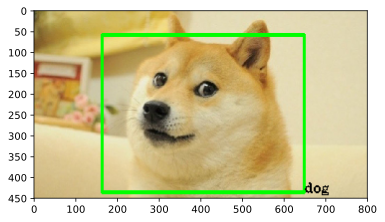

In [28]:
topLeft=(result[0]["topleft"]["x"],result[0]["topleft"]["y"])
bottomRight=(result[0]["bottomright"]["x"],result[0]["bottomright"]["y"])
label=result[0]["label"]
confidence=result[0]["confidence"]
img=cv2.rectangle(img,topLeft,bottomRight,(0,255,0),7)
cv2.putText(img,label,bottomRight,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()